#  <---------------------------```Face Recognization```--------------------------->

``` It is a real time face recognization model, I am a intern in Juntran technoloy Bangalore, in this model we have used transfer learning technique, we tried with defferent models like VGG16, VGG19, AlexNet, ResNet50, GoogleNet version1,2,3 and MobileNet. with defferent parameters. it is giving 100% accuracy.```

dataset =>


train = [size(224*224*3), classes=8, count=1144/per class]


test = [size(224*224*3), classes=8, count=60/per class]

### -------------------------------------------Import some useful libraries-------------------------------------------

In [1]:
import numpy as np  # for linear algebra
from tensorflow import keras
from keras.models import Model
import matplotlib.pyplot as plt # for plotting graphs
from keras.models import Sequential
from keras.applications import MobileNet
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
#from keras.layers.normalization import BatchNormalization

2022-12-11 16:07:55.444820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 16:07:55.560605: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-11 16:07:55.560629: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-11 16:07:56.115325: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## --------------------------------------- Model Building ------------------------------------

In [2]:
# 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224 

# MobileNet model without the top or FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

2022-12-11 16:07:57.303000: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-11 16:07:57.303019: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-11 16:07:57.303032: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (GaribaITServices): /proc/driver/nvidia/version does not exist
2022-12-11 16:07:57.303193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 ReLU False
4 DepthwiseConv2D False
5 BatchNormalization False
6 ReLU False
7 Conv2D False
8 BatchNormalization False
9 ReLU False
10 ZeroPadding2D False
11 DepthwiseConv2D False
12 BatchNormalization False
13 ReLU False
14 Conv2D False
15 BatchNormalization False
16 ReLU False
17 DepthwiseConv2D False
18 BatchNormalization False
19 ReLU False
20 Conv2D False
21 BatchNormalization False
22 ReLU False
23 ZeroPadding2D False
24 DepthwiseConv2D False
25 BatchNormalization False
26 ReLU False
27 Conv2D False
28 BatchNormalization False
29 ReLU False
30 DepthwiseConv2D False
31 BatchNormalization False
32 ReLU False
33 Conv2D False
34 BatchNormalization False
35 ReLU False
36 ZeroPadding2D False
37 DepthwiseConv2D False
38 BatchNormalization False
39 ReLU False
40 Conv2D False
41 BatchNormalization False
42 ReLU False
43 DepthwiseConv2D False
44 BatchNormalization False
45 ReLU False
46 Conv2D False
47 BatchNormalization False
48

#### .........................................................adding required layer for output...........................................................

In [3]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

## --------------------------------- Generate Summary ---------------------------------

In [4]:
# Set our class number to 8
num_classes = 8

FC_Head = lw(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

####         -------------------------------------------------- Data Preprocessing ------------------------------------------------

In [5]:
train_data_dir = '/home/sangramdh/images/aud_train/'
validation_data_dir = '/home/sangramdh/images/test/'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255)
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 11438 images belonging to 8 classes.
Found 480 images belonging to 8 classes.


#### View the classes of dataset

In [6]:
train_generator.class_indices

{'feraz_a': 0,
 'ganesh_a': 1,
 'lakshmee_a': 2,
 'pooja_a': 3,
 'roshan_a': 4,
 'sathish_a': 5,
 'shrikant_a': 6,
 'shruthi_a': 7}

In [7]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

##  <--------------------------------- Train The Model -------------------------------------

In [20]:
# we put our call backs into a callback list
#callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])
model.fit(train_generator,
          epochs = 5,
          callbacks=[EarlyStopping(monitor='val_loss', patience=1)],
        validation_data= validation_generator,
        verbose=True)
# Enter the number of training and validation samples here
# nb_train_samples = 11438
# nb_validation_samples = 480

# We only train 5 EPOCHS 
# epochs = 5

# history = model.fit(
#     train_generator,
#     steps_per_epoch = len(train_generator) // batch_size,
#     epochs = epochs,
#     callbacks = callbacks,
#     validation_data = validation_generator,
#     validation_steps = len(validation_generator) // batch_size)

Epoch 1/5
358/358 [==============================] - 141s 391ms/step - loss: 0.2732 - accuracy: 0.9855 - val_loss: 0.0307 - val_accuracy: 0.9917
Epoch 2/5
358/358 [==============================] - 145s 405ms/step - loss: 0.1098 - accuracy: 0.9945 - val_loss: 1.4901e-09 - val_accuracy: 1.0000
Epoch 3/5
358/358 [==============================] - 146s 408ms/step - loss: 0.0794 - accuracy: 0.9949 - val_loss: 4.2591e-04 - val_accuracy: 1.0000


###             <...........................................Model Evalutation.................................................

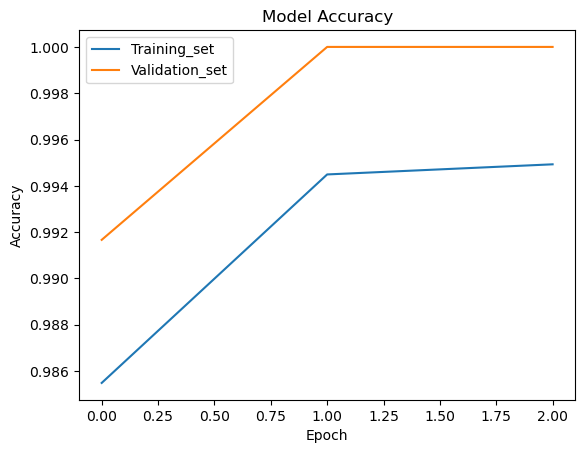

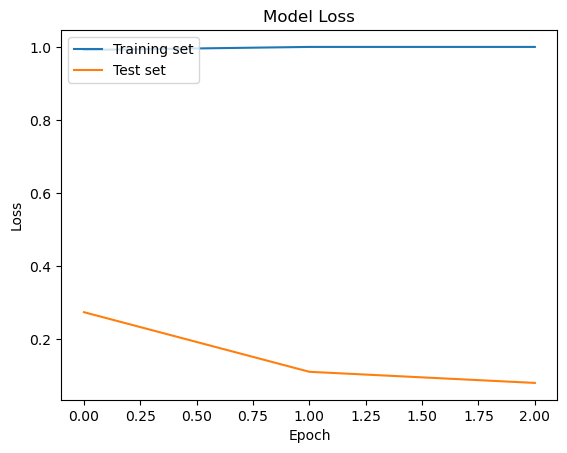

In [21]:
#Accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training_set', 'Validation_set'], loc='upper left')
plt.show()

# Loss 
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [10]:
tran_evl = model.evaluate(train_generator, verbose=True)
tran_evl

358/358 [==============================] - 135s 378ms/step - loss: 0.0044 - accuracy: 0.9989


[0.004431858658790588, 0.9988634586334229]

In [11]:
test_evl = model.evaluate(validation_generator, verbose=True)
test_evl

15/15 [==============================] - 6s 389ms/step - loss: 0.0055 - accuracy: 0.9979


[0.0054946658201515675, 0.9979166388511658]

### < ------------------------------------ Saving The Model -------------------------------------->

In [12]:
model.save("model.h5")

####   <---------------------------------------Lets Do Some Prediction For unseen dataset---------------------------------------->

In [13]:
model = keras.models.load_model('model.h5')

In [14]:
train_generator.class_indices

{'feraz_a': 0,
 'ganesh_a': 1,
 'lakshmee_a': 2,
 'pooja_a': 3,
 'roshan_a': 4,
 'sathish_a': 5,
 'shrikant_a': 6,
 'shruthi_a': 7}

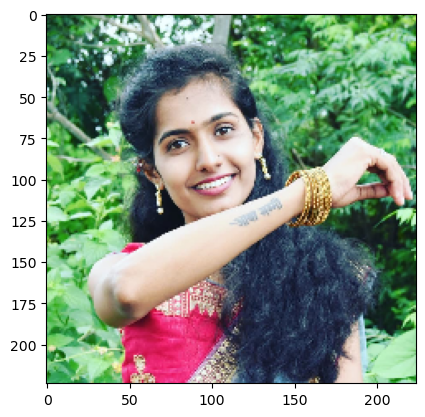

In [15]:
im = load_img("/home/sangramdh/data/pooja/IMG_20210808_165946_265.jpg", target_size=(224, 224, 3))
plt.imshow(im)

In [16]:
im = img_to_array(im)
im = np.expand_dims(im, axis =0)
im=im/255

In [17]:
model.predict(im)

1/1 [==============================] - 0s 307ms/step


array([[6.3307841e-16, 4.6963196e-16, 2.6474434e-23, 1.0000000e+00,
        5.0910762e-11, 2.3425160e-25, 5.2464522e-20, 6.0957575e-25]],
      dtype=float32)

In [18]:
np.round(model.predict(im))

1/1 [==============================] - 0s 26ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

####                 <---------------------------------------- This was Experiment part -------------------------------------->

In [ ]:
#pip install -q -U keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
def model_builder(hp):
    # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_generator, validation_generator, epochs=5, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
#  Results

# After training, a separate test set was used to evaluate the performance of the CNN classifier. 
# The test set is a little unbalanced as 63% of the test images are pneumonia.
# I also use this number as baseline accuracy. 
# The CNN classifier on Test_set achieved an accuracy of 89%, 
# which is substantially better than the baseline accuracy.

print('The testing accuracy is :', val_accuracy[1]*100, '%')

from keras.preprocessing import image
test_image = image.load_img('/home/sangramdh/images/pred_data/265.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)
train_data_dir.class_indices
print(train_data_dir.class_indices)
if result[0][0] == 0:
    prediction = 'Normal'
    print(" The test image is")
    print(prediction)
else:
    prediction = 'Pneumonia'
    print(" The test image is")
    print(prediction)

In [ ]:
from keras.models import load_model

classifier = load_model('model.h5')

import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": "Feraz",
                       "[1]": "Ganesh",
                       "[2]": "Lakshmee",
                       "[3]": "Pooja",
                       "[4]": "Roshan",
                       "[5]": "Sathish",
                       "[6]": "Shrikant",
                       "[7]": "Shruthi"}

monkey_breeds_dict_n = {"[0]": "Feraz",
                           "[1]": "Ganesh",
                           "[2]": "Lakshmee",
                           "[3]": "Pooja",
                           "[4]": "Roshan",
                           "[5]": "Sathish",
                           "[6]": "Shrikant",
                           "[7]": "Shruthi"}

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)

for i in range(0,10):
    input_im = getRandomImage("/home/sangramdh/images/test/ganesh/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()